# Brest Cancer Prediction

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype


In [5]:
df = pd.read_csv("../data/Brest_cancer_dataR2.csv")

In [6]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [8]:
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [9]:
df2 = df.copy()
df2['Classification'] = df2['Classification'].astype('category')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


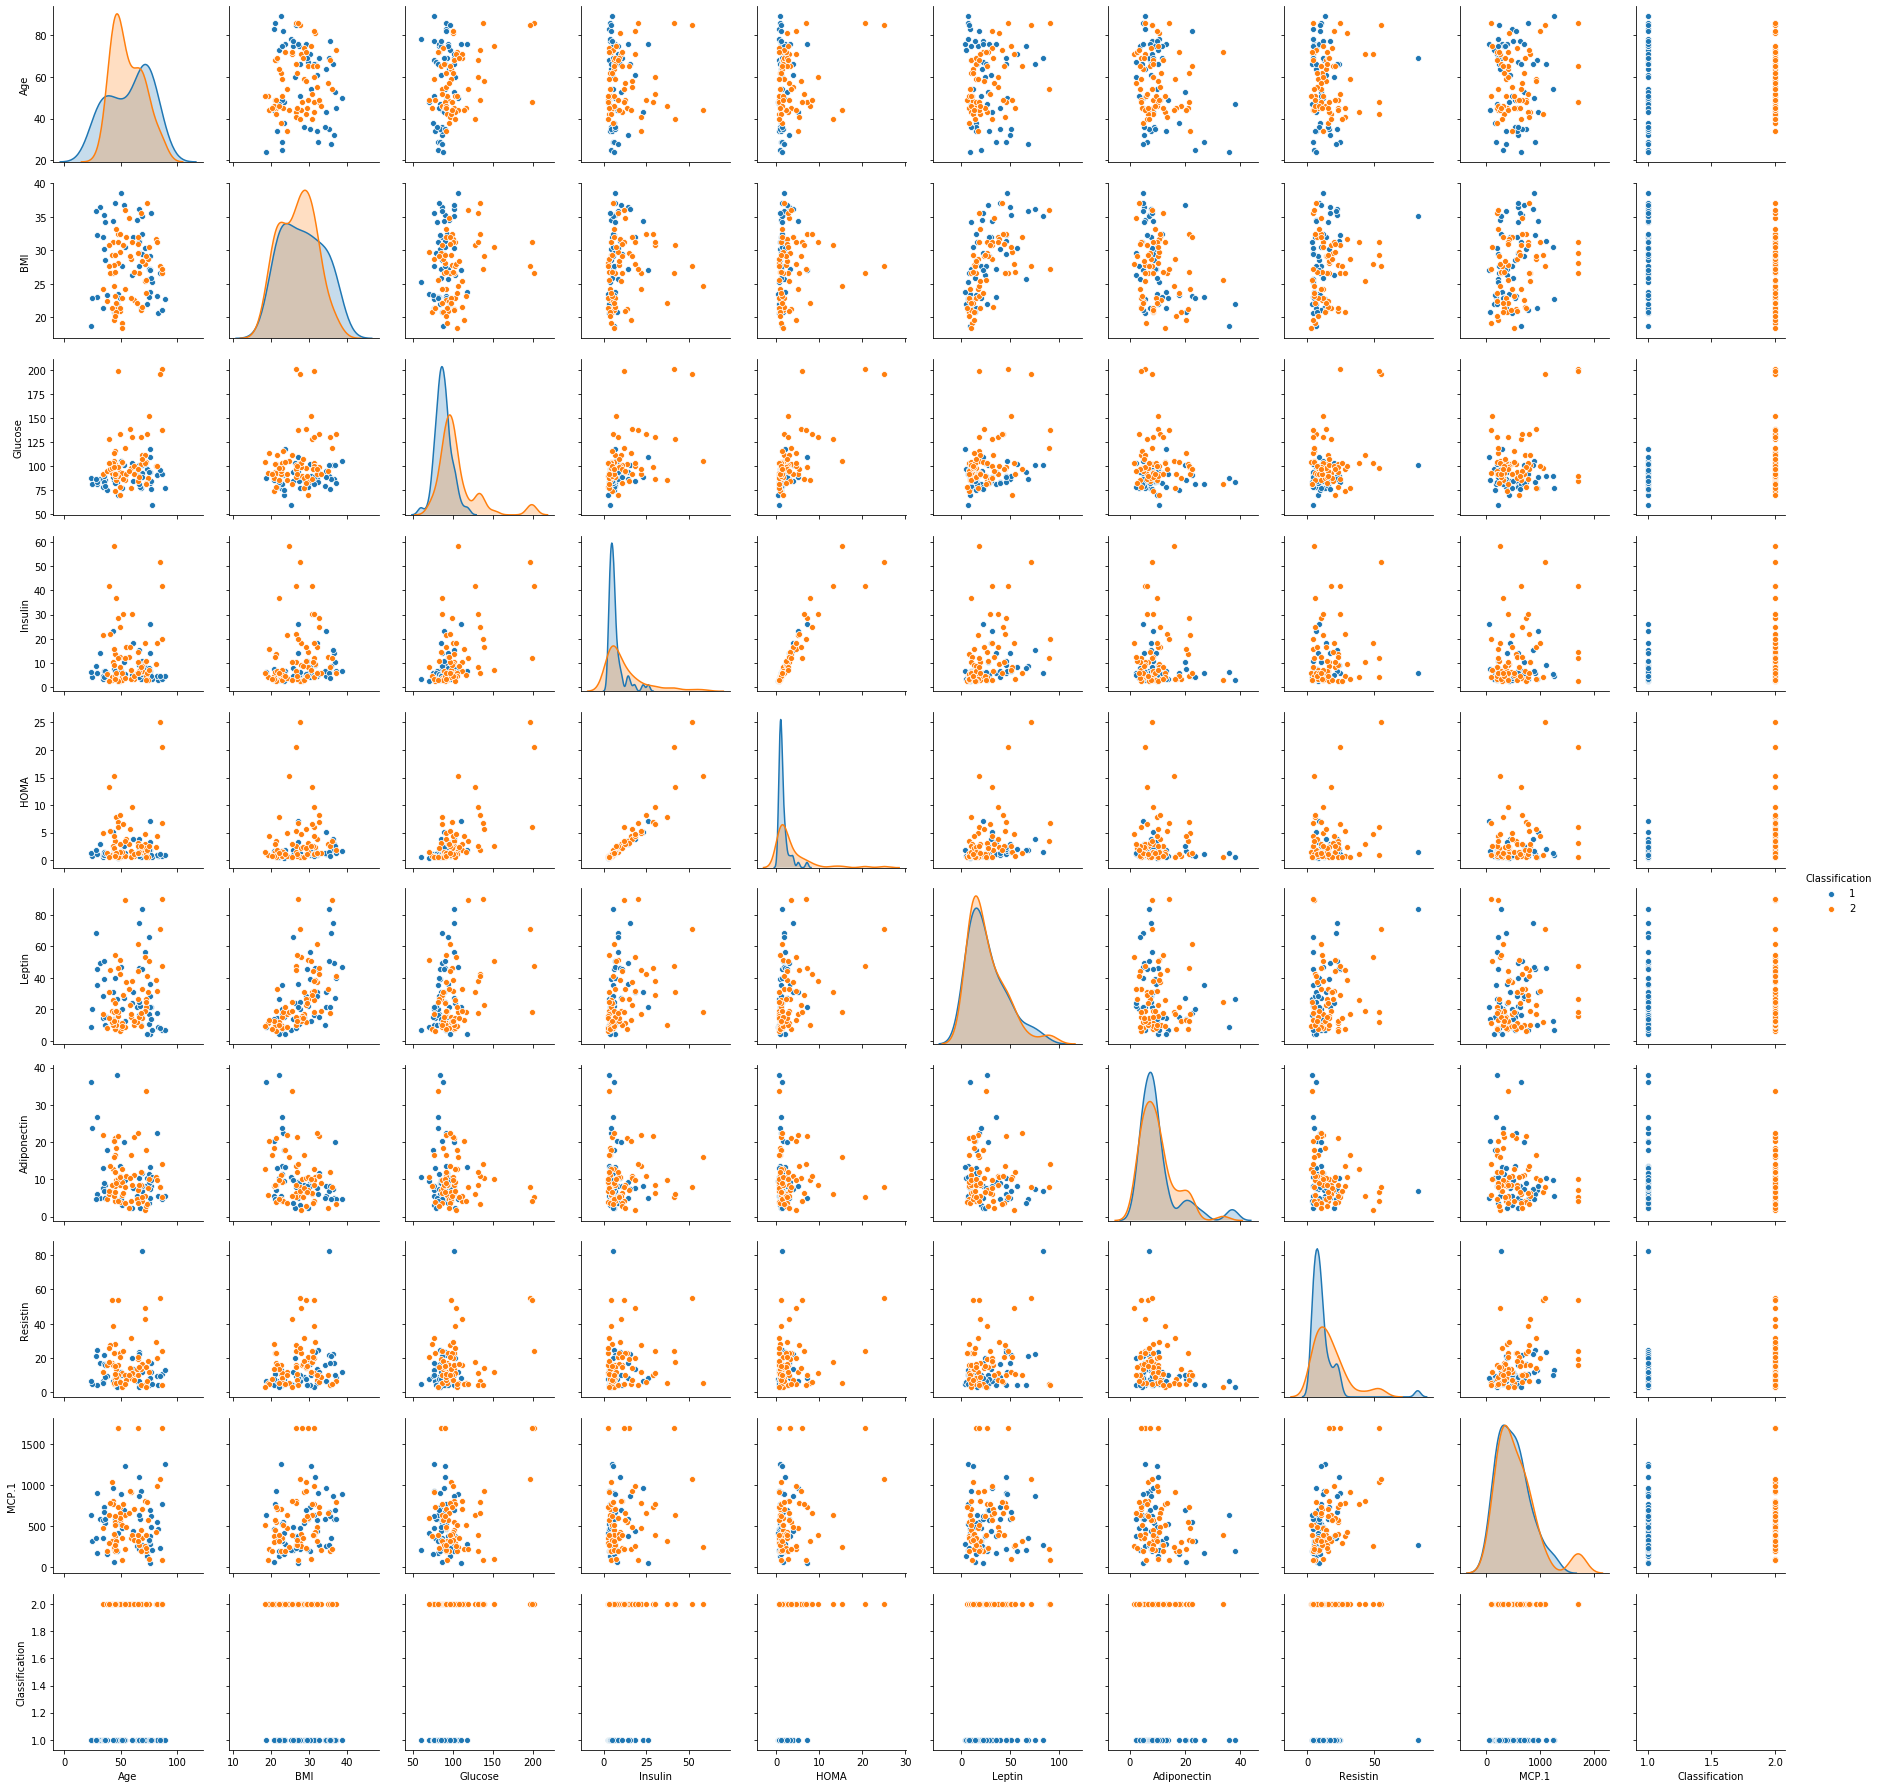

In [10]:
sns.pairplot(df2,hue="Classification")

## k-means

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,0:8])
    wcss.append(kmeans.inertia_)
    

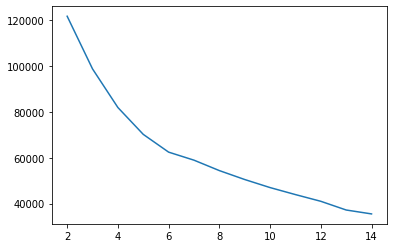

In [15]:
sns.lineplot(x=range(2, 15), y=wcss)

In [17]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,0:8])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
df2['cluster'] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


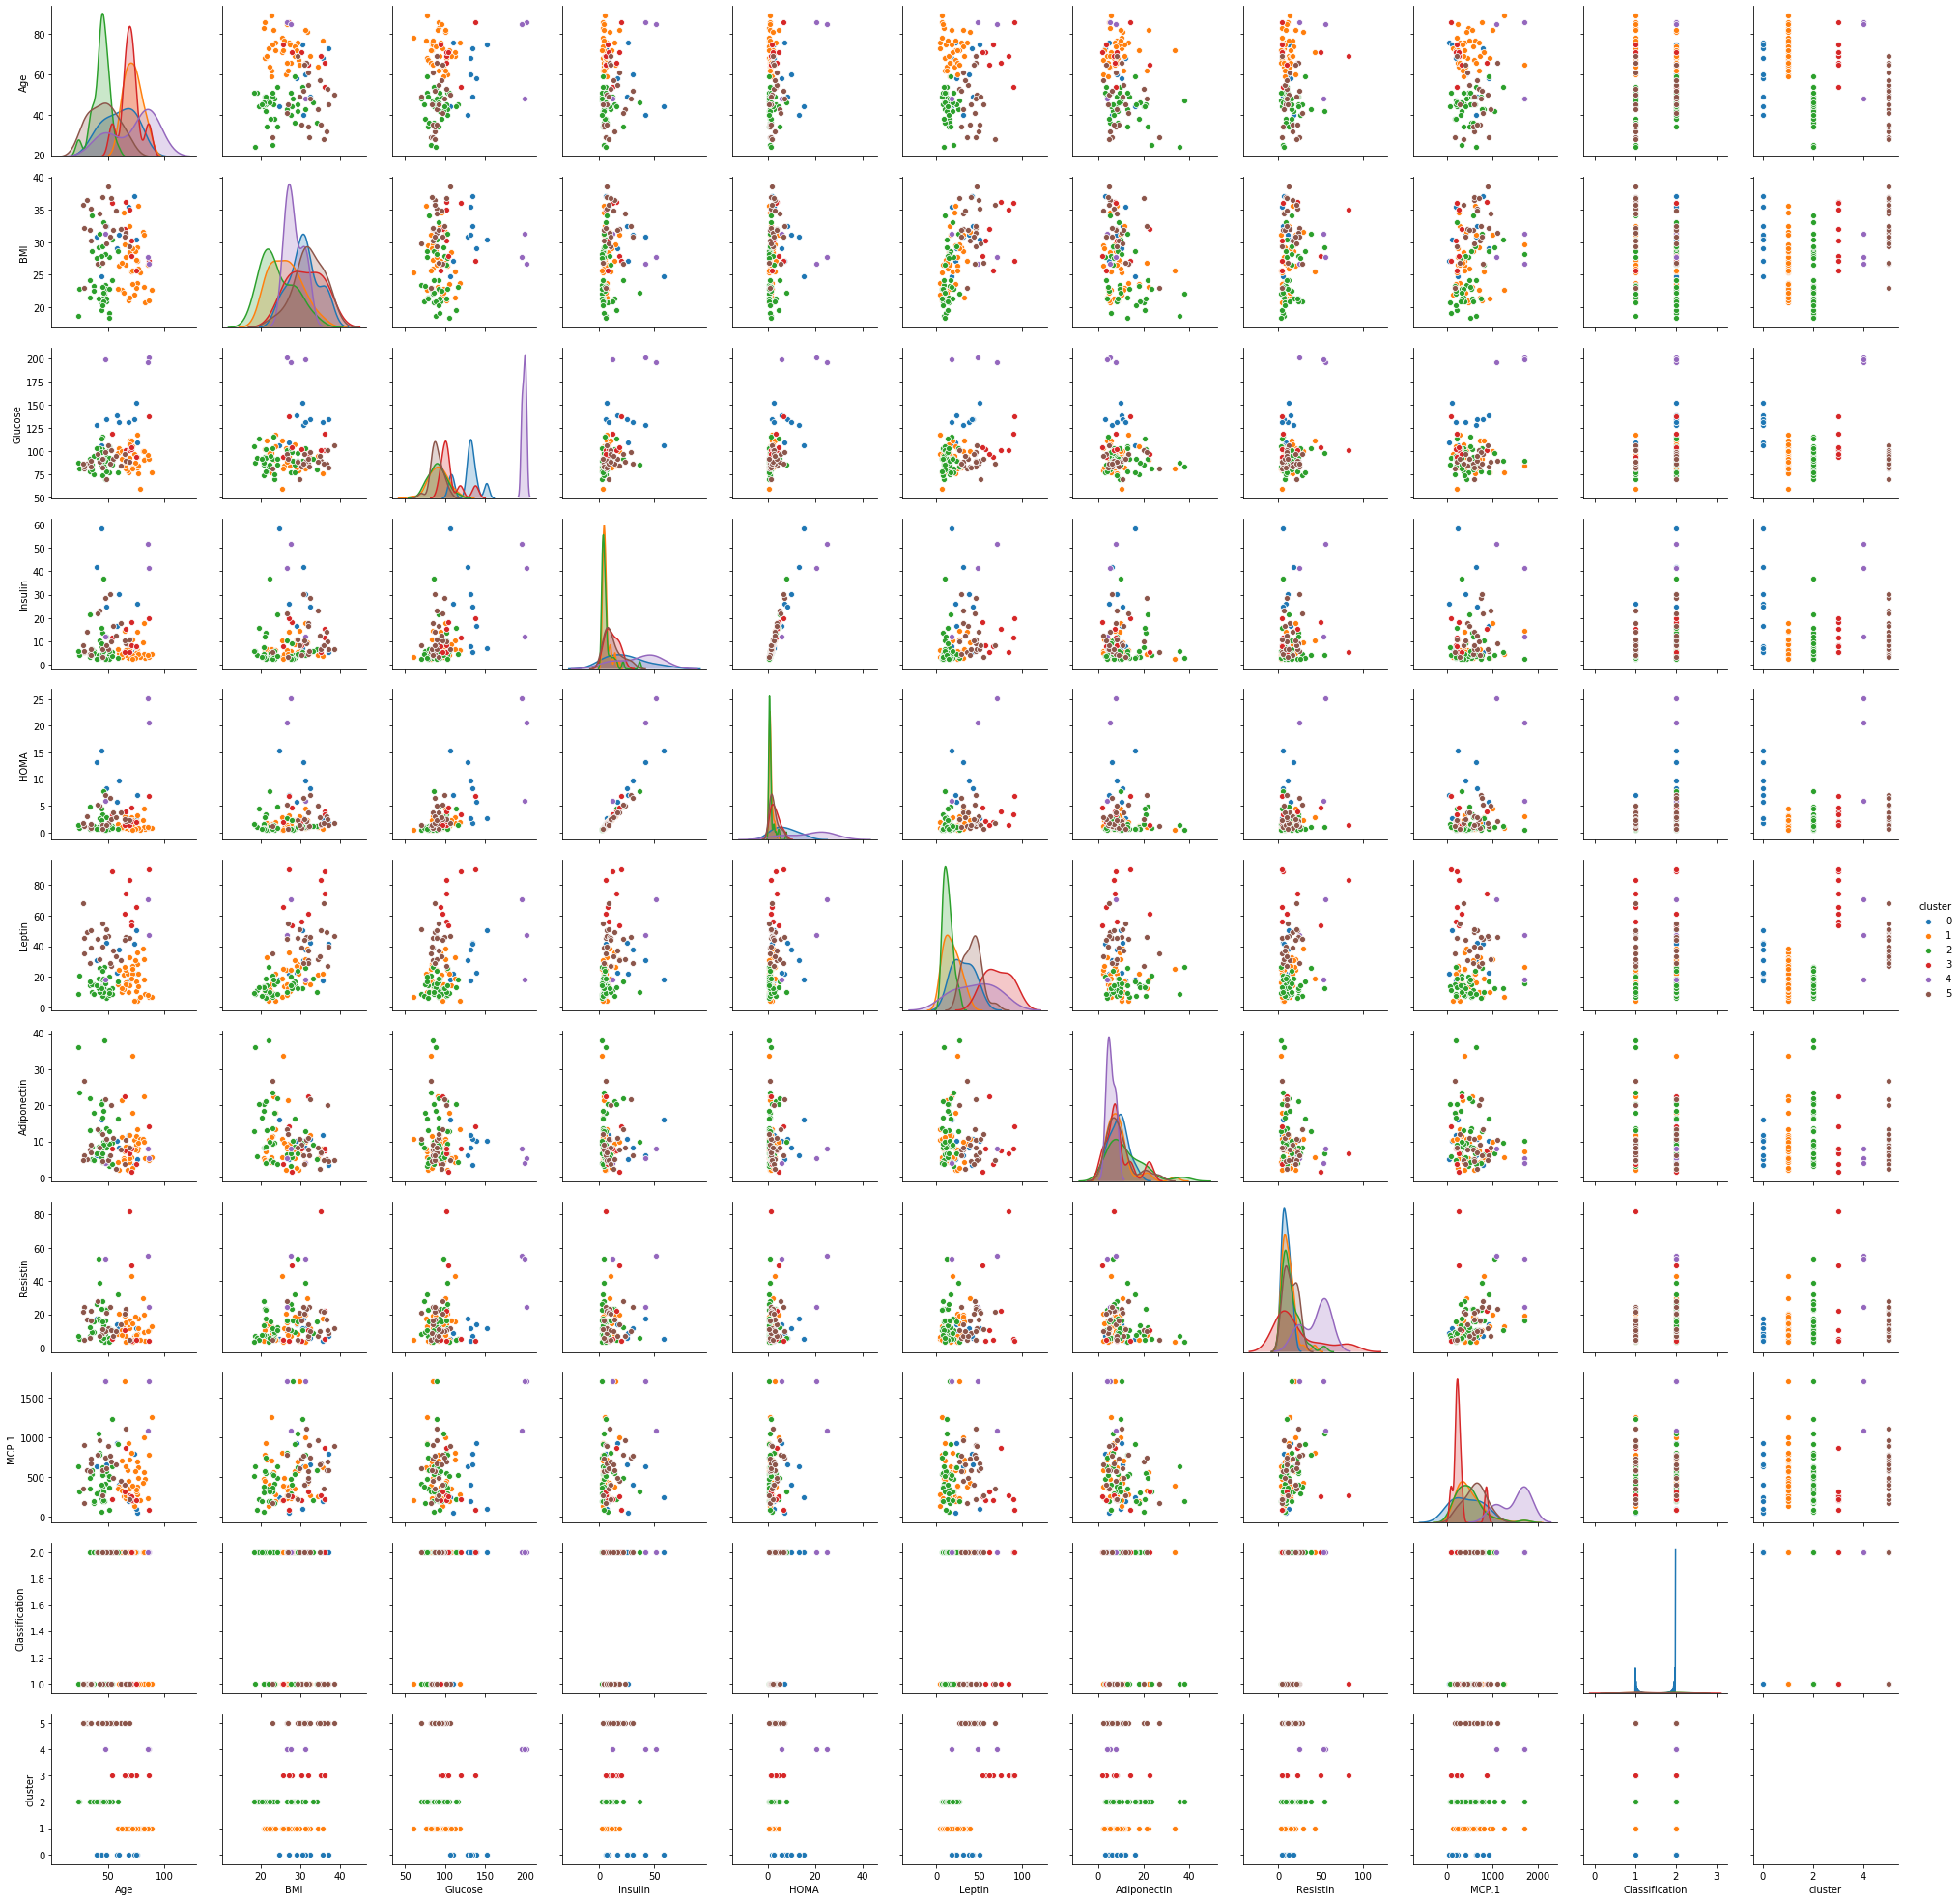

In [19]:
sns.pairplot(df2,hue="cluster")

In [20]:
pd.crosstab(df2.cluster,df2.Classification)

Classification,1,2
cluster,,
0,1,8
1,21,16
2,12,25
3,4,4
4,0,3
5,14,8


In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [22]:
linked = linkage(df.iloc[:,0:8], 'ward')

labelList = range(2, 15)

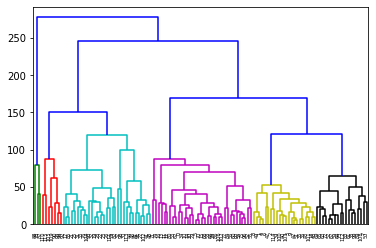

In [25]:
dn = dendrogram(linked,color_threshold=120)


In [23]:
df2['hcluster'] = fcluster(linked, 6, criterion='maxclust')

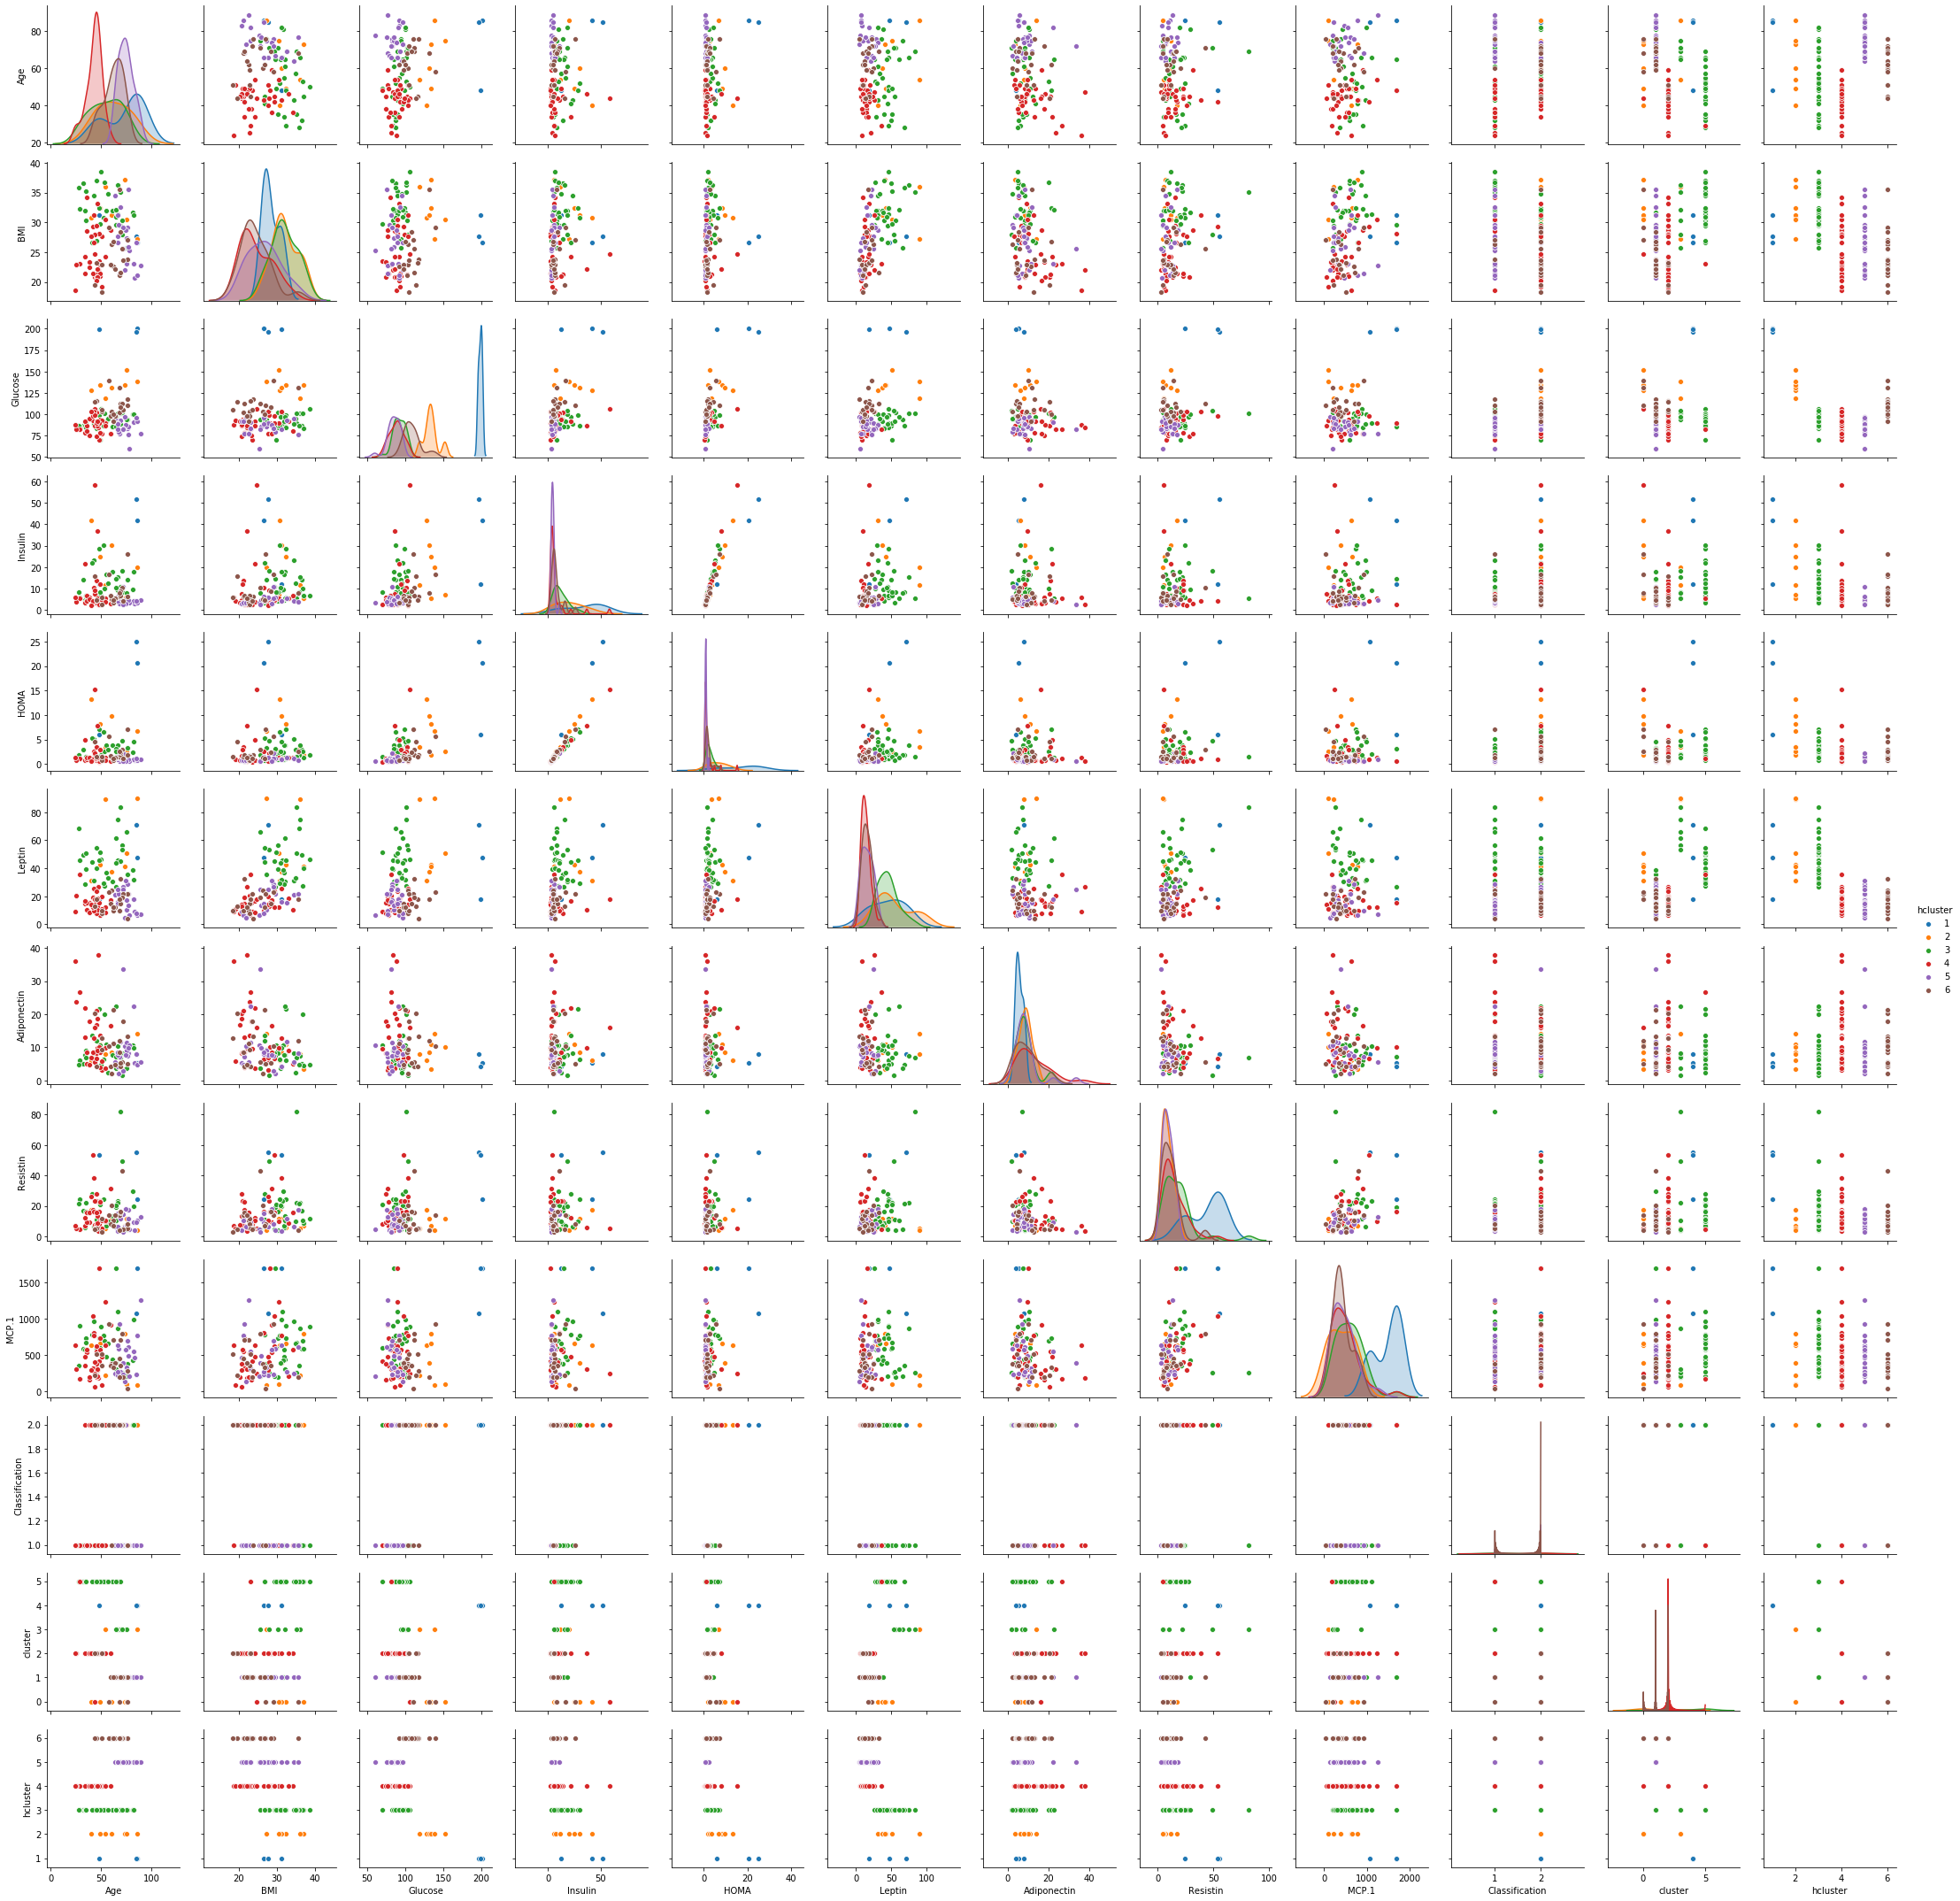

In [24]:
sns.pairplot(df2,hue="hcluster")

In [26]:
pd.crosstab(df2.hcluster,df2.Classification)

Classification,1,2
hcluster,,
1,0,3
2,0,7
3,18,13
4,13,22
5,18,4
6,3,15


In [27]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4,5,6
cluster,,,,,,
0,0,5,0,1,0,3
1,0,0,4,0,22,11
2,0,0,0,33,0,4
3,0,2,6,0,0,0
4,3,0,0,0,0,0
5,0,0,21,1,0,0


In [28]:
df2.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster,hcluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,2.215517,4.034483
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,1.575939,1.250607
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000,3.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000,4.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,3.000000,5.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,5.000000,6.000000


In [29]:
df2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,2,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,1,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,1,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,1,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,1,5


# Partition of the data

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
nv = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
nc = ['cluster','hcluster']
yv = 'Classification'

In [106]:
X = df2.loc[:,nv+nc]
y = df2.Classification

In [107]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,2,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,5


In [108]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: category
Categories (2, int64): [1, 2]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)


# Models

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
yhat1 = mod1.predict(X_train)
yhat1

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1])

In [113]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[5.55681330e-01, 4.44318670e-01],
       [1.67359522e-01, 8.32640478e-01],
       [1.07843667e-01, 8.92156333e-01],
       [7.27856457e-02, 9.27214354e-01],
       [8.26268960e-02, 9.17373104e-01],
       [6.61934637e-01, 3.38065363e-01],
       [8.33896754e-01, 1.66103246e-01],
       [5.43806918e-01, 4.56193082e-01],
       [2.30031430e-01, 7.69968570e-01],
       [2.48855990e-05, 9.99975114e-01],
       [3.43498965e-03, 9.96565010e-01],
       [8.93202196e-01, 1.06797804e-01],
       [7.70946618e-01, 2.29053382e-01],
       [1.39138787e-02, 9.86086121e-01],
       [4.83144355e-08, 9.99999952e-01],
       [3.41983815e-01, 6.58016185e-01],
       [6.58036717e-01, 3.41963283e-01],
       [2.94714020e-01, 7.05285980e-01],
       [1.28108835e-01, 8.71891165e-01],
       [3.54123896e-01, 6.45876104e-01],
       [5.79183737e-01, 4.20816263e-01],
       [9.51450426e-01, 4.85495740e-02],
       [4.45912559e-01, 5.54087441e-01],
       [8.09456631e-01, 1.90543369e-01],
       [2.747167

In [114]:
pd.crosstab(y_train,yhat1)

col_0,1,2
Classification,,
1,22,8
2,7,32


In [116]:
### Accuracy:
mod1.score(X_train,y_train)

0.782608695652174

In [117]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.6595744680851063


col_0,1,2
Classification,,
1,9,13
2,3,22


In [118]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

0.776923076923077
0.6445454545454545


In [66]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }}

In [52]:
res[2] = {'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }

In [67]:
res

{1: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7681159420289855,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7602564102564102,
  'AUC-test': 0.7354545454545454}}

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
mod2 = DecisionTreeClassifier()
mod2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [131]:
yhat2 = mod2.predict(X_train)
yhat2

array([2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1])

In [132]:
yprob2 = mod2.predict_proba(X_train)
yprob2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [133]:
pd.crosstab(y_train,yhat2)

col_0,1,2
Classification,,
1,30,0
2,0,39


In [135]:
yhat2 = mod2.predict(X_test)
print(mod2.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.7021276595744681


col_0,1,2
Classification,,
1,12,10
2,4,21


In [136]:
print(roc_auc_score(y_train, yhat2))
print(roc_auc_score(y_test, yhat2))

ValueError: Found input variables with inconsistent numbers of samples: [69, 47]